# ML Course 1 - Practice (subject)

## Import libraries

Better to do it before any further work.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Original data set

<center> <img src="titanic.png" width=400/> </center>


*On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.*

You can have a quick view on the original data set, but keep in mind that you will not have to work on this exact version today.

In [4]:
dataset = pd.read_csv('Titanic.csv')

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck,Child,Mother
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small,NaN,Adult,Not Mother
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C,Adult,Not Mother
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,NaN,Adult,Not Mother
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C,Adult,Not Mother
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton,NaN,Adult,Not Mother


## Simplified data set

To start will a more simple date set, we provide a simplified version of the Titanic data set with only the following variables:

| Variable | Definition | Key |
|---|---|---|
| Embarked | Port of Embarkation | 0 = Cherbourg, 1 = Queenstown, 2 = Southampton |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Fare | Passenger fare |  |
| Sex | Sex | 0 = male, 1 = female |
| Age | Age in years |  |
| Survived | Survival | 0 = No, 1 = Yes |

In [6]:
dataset = pd.read_csv('titanic_simplified.csv')

In [7]:
dataset.head()

,Embarked,Pclass,Fare,Sex,Age,Survived
0,2,3,7.2500,0,22.0,0
1,0,1,71.2833,1,38.0,1
2,2,3,7.9250,1,26.0,1
3,2,1,53.1000,1,35.0,1
4,2,3,8.0500,0,35.0,0


Your mission is to explore the data set and extract some information to answer this open question:
**“What sorts of passengers were more likely to survive?”**  

**_Note:_ Your graphs should formatted so they are easily readable. It is expected that you provide a title and axis labels, as well as a legend when necessary.** 

## Part 1: General information 
Using Pandas tools, display the following pieces of information:

### a) What is the number of passengers?

In [9]:
# Get the number of passengers
num_passengers = dataset.shape[0]

# Print the result
print("Number of passengers: ", num_passengers)

Number of passengers:  891


### b) What is the mean age of the passengers?

In [10]:
# Get the mean age of the passengers
mean_age = dataset['Age'].mean()

# Print the result
print("Mean age of the passengers: ", mean_age)

Mean age of the passengers:  29.789191919191918


### c) How many passengers are above 70 years old?

In [11]:
# Get the number of passengers above 70 years old
num_above_70 = dataset[dataset['Age'] > 70]['Age'].count()

# Print the result
print("Number of passengers above 70 years old: ", num_above_70)

Number of passengers above 70 years old:  8


### d) What proportion of passengers are in each class? (1st, 2nd, 3rd)

In [13]:
# Get the proportion of passengers in each class
prop_class = dataset['Pclass'].value_counts(normalize=True)

# Print the result
print("Proportion of passengers in each class:\n", prop_class)

Proportion of passengers in each class:
 Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64


## Part 2: Your first data exploration
Using, Matplotlib, make plots that display the required information

### a) Show the relationship between fare paid by the passengers and their age 
You suspect that in general, older passengers might have paid more for their tickets than the young passengers. To verify this, plot all the data points to see if there is a trend.  
Additional instructions:
- Which type of plot is the most appropriate for this? A normal (line) plot, or scatter plot? I let you try and decide. 😄
- Don't forget to add a title and axis labels to your graph.

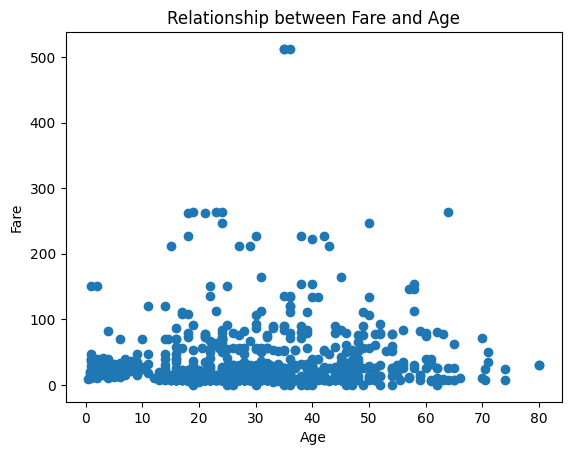

In [14]:
# Plot the fare paid by the passengers against their age
plt.scatter(dataset['Age'], dataset['Fare'])
plt.title('Relationship between Fare and Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

📝 TEXT ANSWER: In the text cell below, write down what you conclude from the graph.

The scatter plot reveals that there is no obvious correlation between the passengers' fares and ages. Young people made up some of the high-fare passengers, while older people made up the low-fare passengers. As a result, we are unable to draw the generalization that older travelers paid more for their tickets than younger ones.

### b) Show the age distributions of the passengers depending on the port of embarkment
Your friend told you that Queenstwon is full of retired people and you suspect that passengers who left from there are older that those who left from the two other ports. Find out by making a graph that allows you to compare the age distributions between the three ports.  
Additional instructions:
- Use a density plot.
- Your figure should have three curves, one for each port: Cherbourg, Queenstown, Southampton.
- Display the three curves on the same figure for easy comparison.
- If you make your plot carefully, your legend should indicate the name of the port that corresponds to each curve.
- Don't forget to add a title and axis labels to your graph.

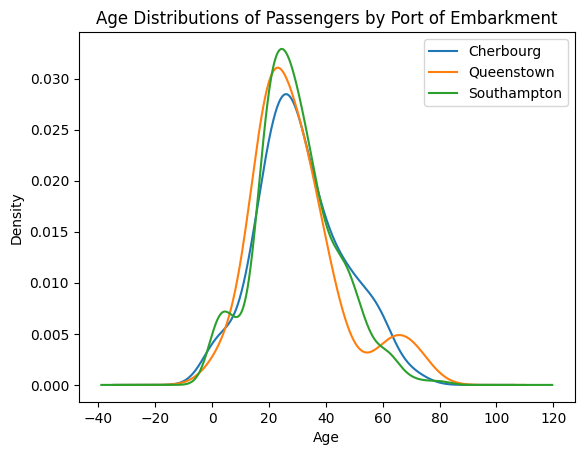

In [16]:
# Create a density plot for the age distribution of passengers from Cherbourg
dataset[dataset['Embarked'] == 0]['Age'].plot(kind='density', label='Cherbourg')

# Create a density plot for the age distribution of passengers from Queenstown
dataset[dataset['Embarked'] == 1]['Age'].plot(kind='density', label='Queenstown')

# Create a density plot for the age distribution of passengers from Southampton
dataset[dataset['Embarked'] == 2]['Age'].plot(kind='density', label='Southampton')

# Add a title and axis labels to the graph
plt.title('Age Distributions of Passengers by Port of Embarkment')
plt.xlabel('Age')
plt.ylabel('Density')

# Add a legend to the graph
plt.legend()

# Display the graph
plt.show()

📝 TEXT ANSWER: In the text cell below, write down what you conclude from the graph.

The density plot reveals that the passenger age distributions from the three ports of embarkation are comparable. Therefore, it is impossible to draw the conclusion that passengers departing from Queenstown are older than those departing from the other two ports.

###### Work of Sela Grace Koshy

## Part 3:  Data Exploration related with survival
Now, let's perform analyses that will help you get intutions about the factors that might have influenced survival.

### a) How is age linked to survival?
You want to know if the age of a passenger gives you any information about their probability of surviving. Make a plot that helps you find this out.

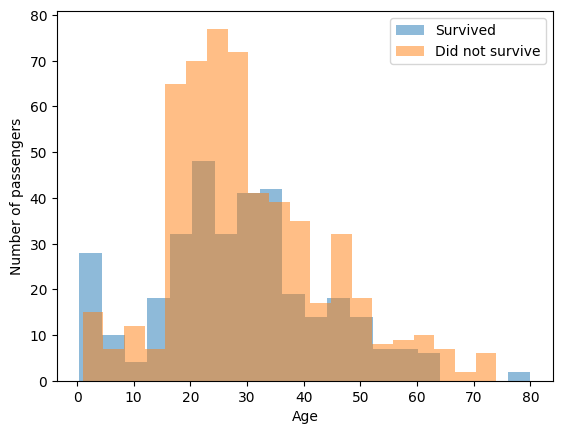

In [17]:
# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot a histogram of age for survivors
ax.hist(dataset[dataset['Survived'] == 1]['Age'], bins=20, alpha=0.5, label='Survived')

# Plot a histogram of age for non-survivors
ax.hist(dataset[dataset['Survived'] == 0]['Age'], bins=20, alpha=0.5, label='Did not survive')

# Add a legend and axis labels
ax.legend()
ax.set_xlabel('Age')
ax.set_ylabel('Number of passengers')

# Show the plot
plt.show()

📝 TEXT ANSWER: In the text cell below, write down what you conclude from your graph.

However, there doesn't appear to be a clear correlation between age and survival overall. This plot demonstrates that there were more survivors than non-survivors in the age range of 20 to 30.

### b) Were men or women more likely to die?  
Find an answer to this question in any way you like.

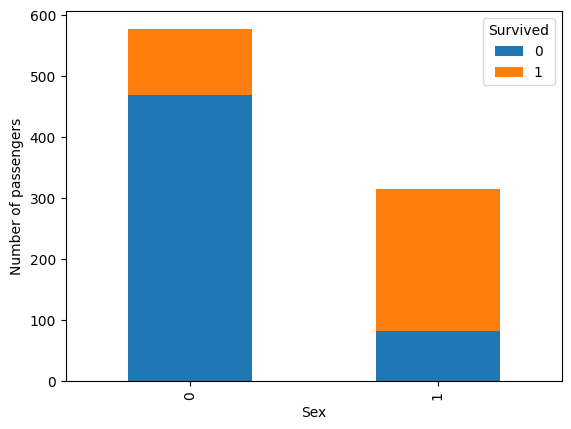

In [21]:
# Create a contingency table of sex vs. survival
contingency_table = pd.crosstab(dataset['Sex'], dataset['Survived'])

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot a stacked bar chart of sex vs. survival
contingency_table.plot(kind='bar', stacked=True, ax=ax)

# Add axis labels and a legend
ax.set_xlabel('Sex')
ax.set_ylabel('Number of passengers')
ax.legend(title='Survived', loc='upper right')

# Show the plot
plt.show()

📝 TEXT ANSWER: In the text cell below, interpret your plot or your statistics and answer the question with the information you displayed.

This chart clearly shows that female passengers were much more likely to survive than male passengers.

## Interpretation
If you saw the movie _Titanic_, you probably remember that when they board the lifeboats, they say "Children and women first!". Does the data seem to confirm that they prioritized the boarding this way?  
📝 TEXT ANSWER: Write your answer in the text cell below

We haven't yet examined the relationship between age and gender with regard to survival, but based on the data done thus far, it appears that women were more likely to survive than men. Children and women may have had priority while boarding lifeboats, but further investigation is required to prove this.